In [1]:
from skimage import io
from skimage import img_as_float

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

In [4]:
import torch
import numpy as np
import cv2
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from models.prepare_train_val import get_split
from models.transforms import (DualCompose,
                        ImageOnly,
                        Normalize,
                        HorizontalFlip,
                        VerticalFlip,
                        Rotate,
                        RandomBrightness,
                        RandomContrast,
                        AddMargin)

from skimage.io import imread

from models.dataset import SaltDataset


def mask_overlay(image, mask, color=(0, 1, 0)):
    """
    Helper function to visualize mask on the top of the image
    """
    mask = np.dstack((mask, mask, mask)) * np.array(color)
    weighted_sum = cv2.addWeighted(mask, 0.5, image, 0.5, 0.)
    img = image.copy()
    ind = mask[:, :, 1] > 0
    img[ind] = weighted_sum[ind]    
    return img

def imshow(img, mask, title=None):
    """Imshow for Tensor."""
    img = img.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    img = std * img + mean
    img = np.clip(img, 0, 1)
    mask = mask.numpy().transpose((1, 2, 0))
    mask = np.clip(mask, 0, 1)
    fig = plt.figure(figsize = (12,6))
    fig.add_subplot(1,2,1)
    plt.imshow(mask_overlay(img, mask))
    fig.add_subplot(1,2,2)
    plt.imshow(img)
    if title is not None:
        plt.title(title)
    plt.pause(0.001) 


In [65]:
train_ids, val_ids = get_split(0)

In [66]:
train_transform = DualCompose([
        AddMargin(128),
        HorizontalFlip(),
        VerticalFlip(),
        Rotate(),
        ImageOnly(RandomBrightness()),
        ImageOnly(RandomContrast()),
        ImageOnly(Normalize())
    ])

In [101]:
 train_loader = DataLoader(
        dataset=SaltDataset(train_ids, transform=train_transform),
        shuffle=True,
        num_workers=1,
        batch_size=10,
        pin_memory=torch.cuda.is_available())

In [115]:
img1, mask1 = next(iter(train_loader))
imshow(img1[0], mask1[0])

In [76]:
mask1[0].shape

torch.Size([1, 101, 101])

In [78]:
(mask1[0]==1).sum()

tensor(0)

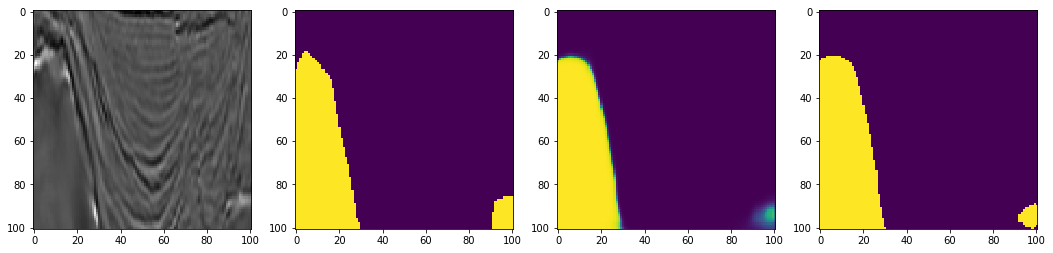

In [79]:
pred_dir = '../data/predictions/'
train_dir = '../data/train/'
def show_image(file_name):
    global mask, mask_pred
    img = imread(train_dir + "images/" + file_name)
    mask = imread(train_dir + "masks/" + file_name)
    mask_pred = img_as_float(imread(pred_dir + file_name))
    fig = plt.figure(figsize = (18,6))
    fig.add_subplot(1,4,1)
    plt.imshow(img)
    fig.add_subplot(1,4,2)
    plt.imshow(mask)
    fig.add_subplot(1,4,3)
    plt.imshow(mask_pred)
    fig.add_subplot(1,4,4)
    plt.imshow((mask_pred>0.2))
#show_image('6c793e5879.png')
#show_image('6a1fe1a81e.png')
show_image('08f3346b8a.png')

In [28]:
mask.shape

(101, 101)

In [71]:
(mask_pred>0).sum()

7239

In [72]:
mask_pred.dtype

dtype('float64')

In [73]:
mask.max()

65535

In [74]:
mask_pred.max()

0.9999694819562066

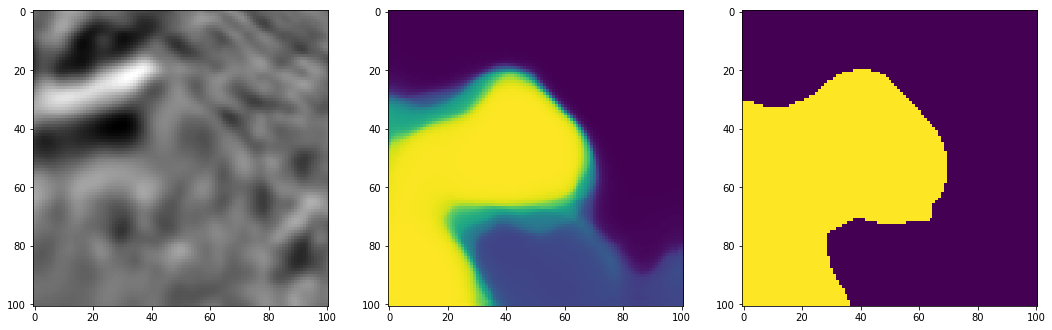

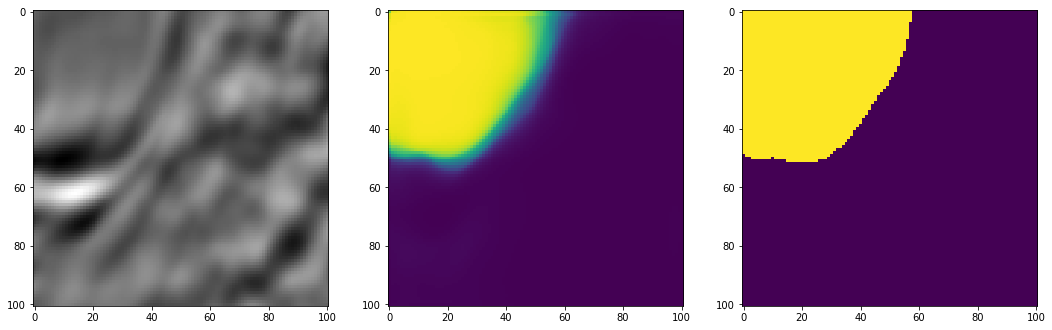

In [12]:
pred_dir = '../data/predictions/test/'
train_dir = '../data/test/'
def show_image(file_name):
    global mask, mask_pred
    img = imread(train_dir + "images/" + file_name)
    mask_pred = img_as_float(imread(pred_dir + file_name))
    fig = plt.figure(figsize = (18,6))
    fig.add_subplot(1,3,1)
    plt.imshow(img)
    fig.add_subplot(1,3,2)
    plt.imshow(mask_pred)
    fig.add_subplot(1,3,3)
    plt.imshow((mask_pred>0.4))

show_image('009d3365bc.png')
show_image('00801127b0.png')
#show_image('feaae39fc4.png')
#show_image('fb56c30236.png')
#show_image('f7c8709aad.png')

In [9]:
mask_pred

array([[2.59403372e-04, 2.59403372e-04, 1.98367285e-04, ...,
        1.12916762e-03, 1.46486610e-03, 1.70901045e-03],
       [3.66216526e-04, 3.20439460e-04, 2.44144350e-04, ...,
        2.18204013e-03, 2.86869612e-03, 3.40276188e-03],
       [3.81475547e-04, 3.05180438e-04, 2.28885328e-04, ...,
        2.88395514e-03, 3.92156863e-03, 4.77607385e-03],
       ...,
       [9.97604334e-01, 9.97833219e-01, 9.98458839e-01, ...,
        9.99252308e-01, 9.98382544e-01, 9.96902419e-01],
       [9.97161822e-01, 9.97451743e-01, 9.97894255e-01, ...,
        9.98794537e-01, 9.97009232e-01, 9.96429389e-01],
       [9.93011368e-01, 9.97833219e-01, 9.97619593e-01, ...,
        9.98596170e-01, 9.97589075e-01, 9.90951400e-01]])